In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('../data/retail_store_data_with_real_items.csv')
data.head()

,Date,Day,Item Name,Price,In Stock,Total Stock,Sales,Stock Left,Revenue
0,2022-01-01,Saturday,Tea,11.65,True,64,19,45,221.35
1,2022-01-01,Saturday,Shaving Cream,36.52,True,78,23,55,839.96
2,2022-01-01,Saturday,All-Purpose Cleaner,13.58,True,109,28,81,380.24
3,2022-01-01,Saturday,Rice,6.30,True,187,14,173,88.20
4,2022-01-01,Saturday,Perfume,43.33,True,137,0,137,0.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         109600 non-null  object 
 1   Day          109600 non-null  object 
 2   Item Name    109600 non-null  object 
 3   Price        109600 non-null  float64
 4   In Stock     109600 non-null  bool   
 5   Total Stock  109600 non-null  int64  
 6   Sales        109600 non-null  int64  
 7   Stock Left   109600 non-null  int64  
 8   Revenue      109600 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 6.8+ MB


In [6]:
data['Item Name'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
109595    False
109596    False
109597    False
109598    False
109599    False
Name: Item Name, Length: 109600, dtype: bool

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

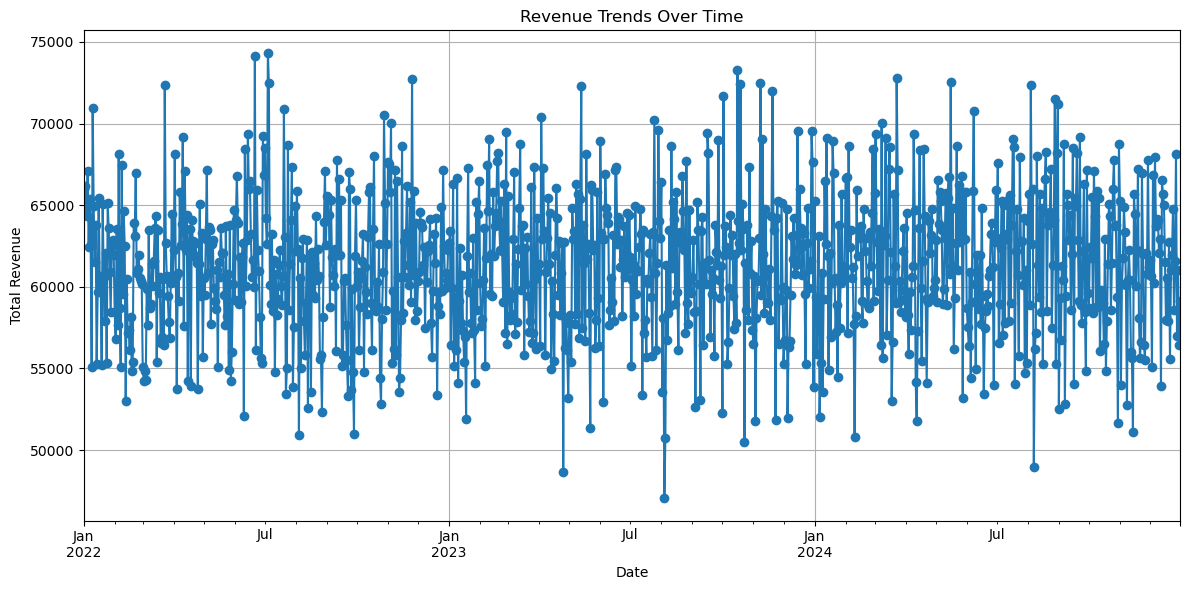

In [9]:
plt.figure(figsize=(12, 6))
data.groupby('Date')['Revenue'].sum().plot(kind='line', marker='o')
plt.title('Revenue Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
data.isnull().sum()

Date           0
Day            0
Item Name      0
Price          0
In Stock       0
Total Stock    0
Sales          0
Stock Left     0
Revenue        0
dtype: int64

In [27]:
def EDA(data):
    print("----------Structure of the Data--------- \n")
    print("Shape of the datasets:", data.shape)
    print("\n Column Names:", data.columns)
    print("\n First 5 rows: \n", data.head())
    print("\n Data Info:\n")
    data.info()
    print("\n----------End Structure of the Data--------- \n")
    print("\n----------Summary, Missing Value, Data types --------- \n")
    print("\nSummary Statistics:\n", data.describe())
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nData Types:\n", data.dtypes)
    print("\n----------End Summary, Missing Value, Data types --------- \n")

In [28]:
EDA(data)

----------Structure of the Data--------- 

Shape of the datasets: (109600, 9)

 Column Names: Index(['Date', 'Day', 'Item Name', 'Price', 'In Stock', 'Total Stock', 'Sales',
       'Stock Left', 'Revenue'],
      dtype='object')

 First 5 rows: 
         Date       Day            Item Name  Price  In Stock  Total Stock  \
0 2022-01-01  Saturday                  Tea  11.65      True           64   
1 2022-01-01  Saturday        Shaving Cream  36.52      True           78   
2 2022-01-01  Saturday  All-Purpose Cleaner  13.58      True          109   
3 2022-01-01  Saturday                 Rice   6.30      True          187   
4 2022-01-01  Saturday              Perfume  43.33      True          137   

   Sales  Stock Left  Revenue  
0     19          45   221.35  
1     23          55   839.96  
2     28          81   380.24  
3     14         173    88.20  
4      0         137     0.00  

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data c

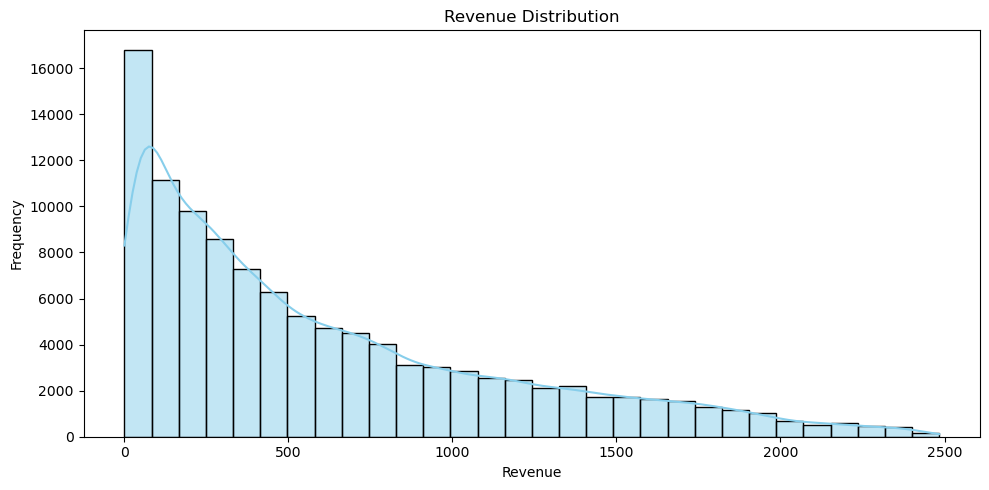

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Revenue'], bins=30, kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

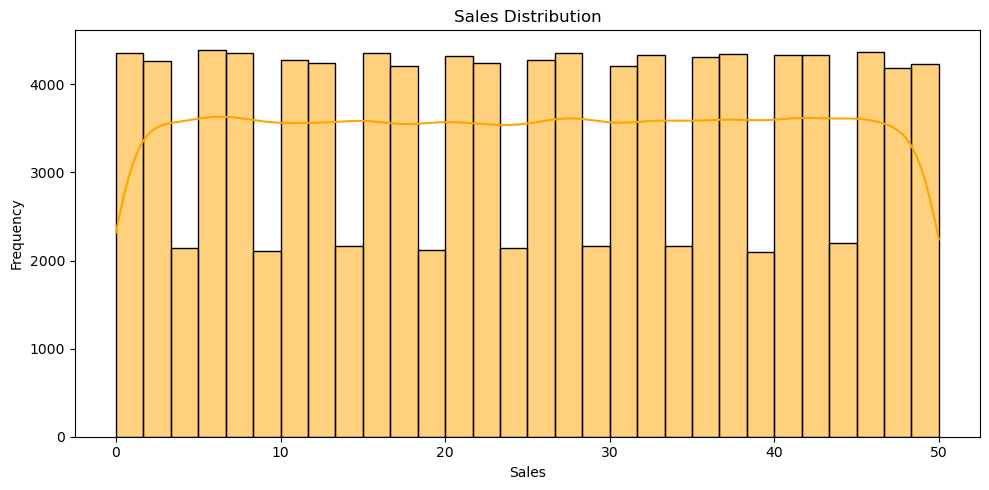

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Sales'], bins=30, kde=True, color='orange')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

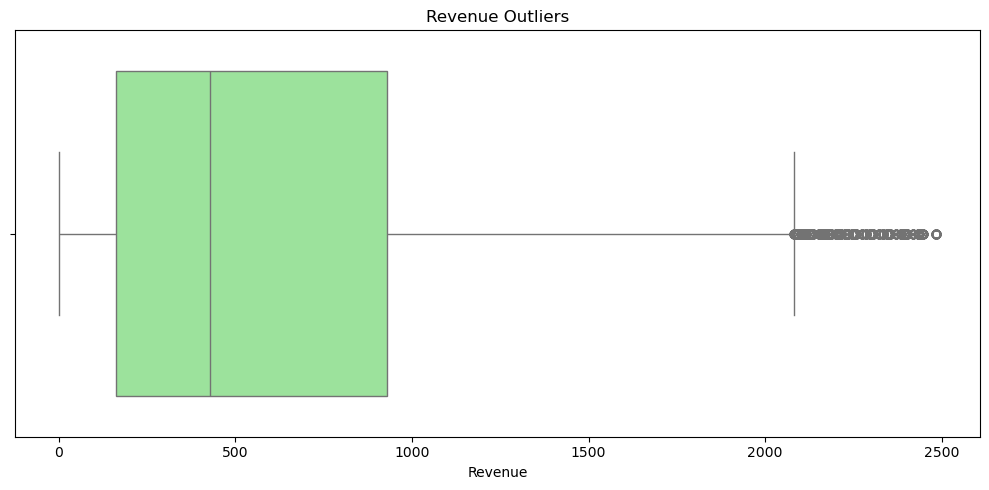

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Revenue', color='lightgreen')
plt.title('Revenue Outliers')
plt.tight_layout()
plt.show()

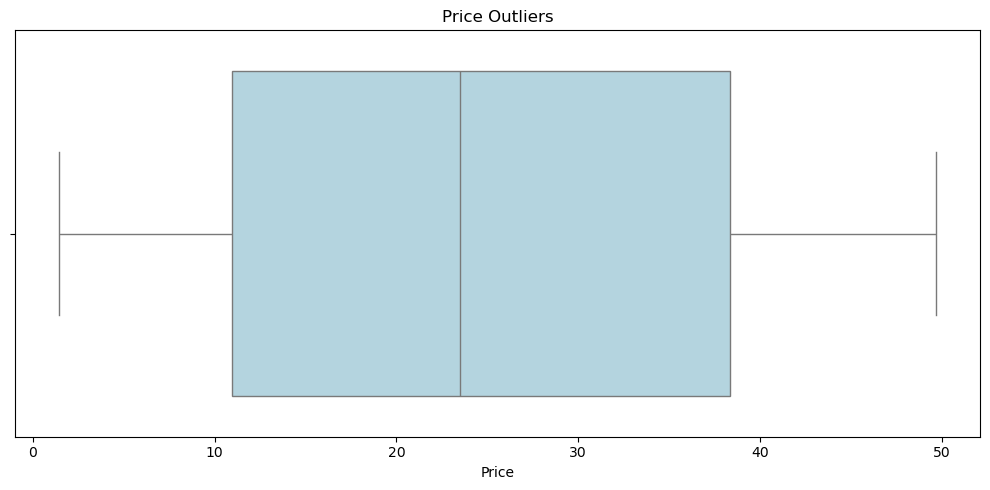

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Price', color='lightblue')
plt.title('Price Outliers')
plt.tight_layout()
plt.show()

In [37]:
numeric_data = data.select_dtypes(include=['float64','int64'])

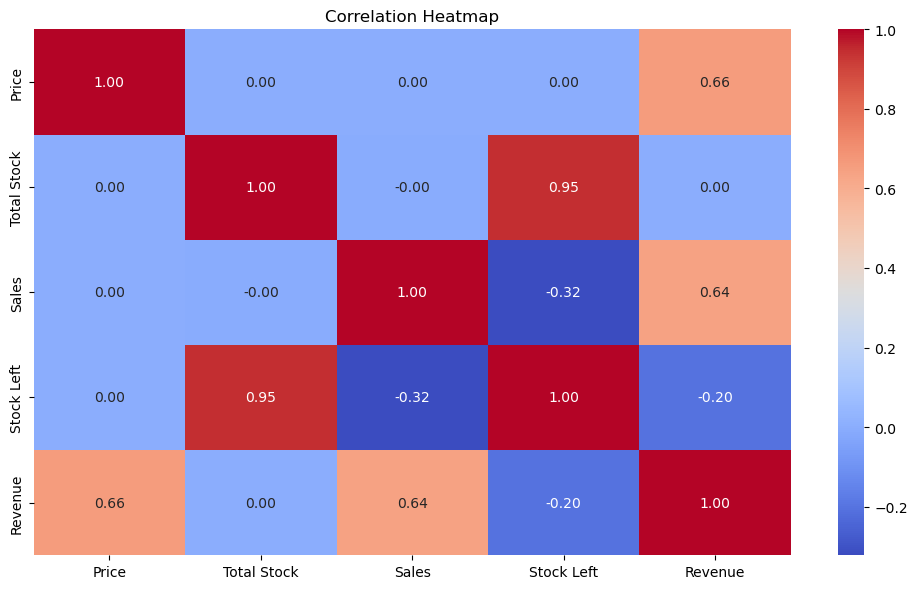

In [38]:
correlation = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()